In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("train_u6lujuX_CVtuZ9i.txt",sep=",")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [7]:

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

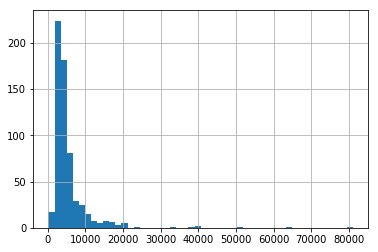

In [10]:
df['ApplicantIncome'].hist(bins=50)

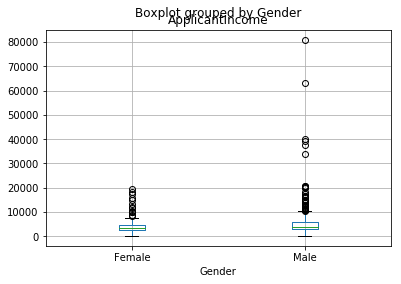

In [12]:
df.boxplot(column='ApplicantIncome', by = 'Gender')
#Men got higher income

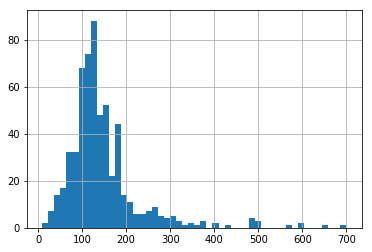

In [16]:
df['LoanAmount'].hist(bins=50) 
#Frequency vc Amount

In [17]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
pt=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
pt

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


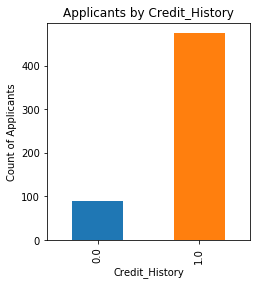

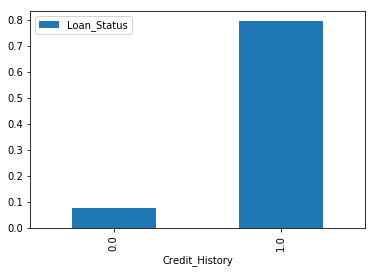

In [27]:
ch = df['Credit_History'].value_counts(ascending=True)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
ch.plot(kind='bar')

ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
pt.plot(kind='bar')


In [28]:
pv = df.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
pv

,Gender
Credit_History,
0.0,0.197674
1.0,0.180258


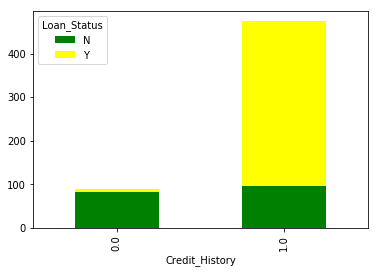

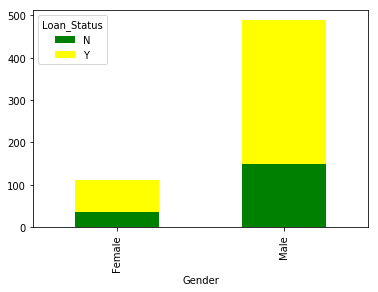

In [29]:
#combining the above 2 plots in a stacked chart
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [30]:
df.apply(lambda x: sum(x.isnull()),axis=0) #to tell the missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
#to fill the missing values by mean 
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
se = df['Self_Employed'].value_counts(ascending=True)
se.head()

Yes     82
No     500
Name: Self_Employed, dtype: int64

In [33]:
#since *no* has ~82% so, we will fill the missing values of this column with "no"
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


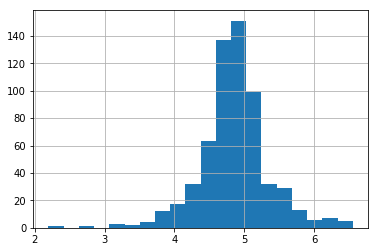

In [34]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
df['LoanAmount_log'].hist(bins=20)

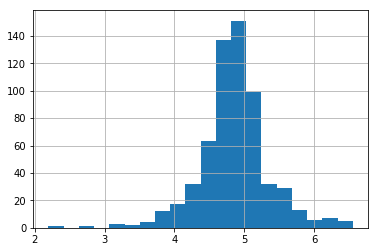

In [35]:
#to decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), we can add CoApplicantIncome to compensate the value 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)


In [36]:
df['Capacity%'] = ((df['LoanAmount'] / df['TotalIncome']) *100).astype(float) #capacity of each applicant of how well he/she is suited to pay back his loan.
df.head(20)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750,2.851986
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305,3.036876
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819,1.465832


In [37]:
#males are around ~81%, so we'll fill the missing values with "male"
df.Gender = df.Gender.fillna('Male')

In [38]:
gen = df['Gender'].value_counts(ascending=True)
gen.head()


Female    112
Male      502
Name: Gender, dtype: int64

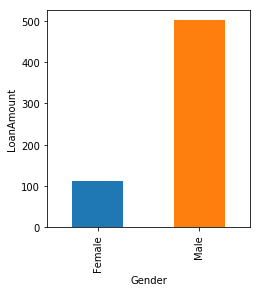

In [39]:
#which gender has more loan amount 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Gender')
ax1.set_ylabel('LoanAmount')

gen.plot(kind='bar')

In [40]:
md = df['Married'].value_counts(ascending=True)
md.head()

No     213
Yes    398
Name: Married, dtype: int64

In [41]:
#yes has ~65% 
#filling the missing values with yes
df.Married = df.Married.fillna('Yes')

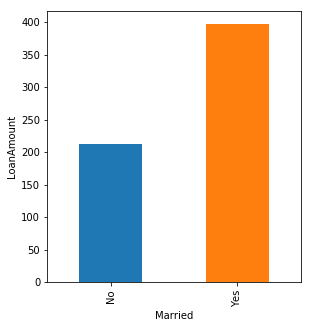

In [42]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Married')
ax1.set_ylabel('LoanAmount')

md.plot(kind='bar')


In [43]:
loan = df['Loan_Status'].value_counts(ascending=True)
loan.head()

N    192
Y    422
Name: Loan_Status, dtype: int64

In [44]:
df.Loan_Status = df.Loan_Status.fillna('1')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204,8.271164


In [45]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
Capacity%            False
dtype: bool

In [46]:
ch = df['Credit_History'].value_counts(ascending=True)
ch.head()

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [47]:
df.Credit_History = df.Credit_History.fillna('1.0')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y,4.948760,6000.0,8.699515,2.350000


In [60]:
#Converting categorical to dummy
from sklearn.preprocessing import LabelEncoder
var_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in var_col:
    df[i] = le.fit_transform(df[i].astype(str)) #Fit label encoder and return encoded labels
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Capacity%            float64
dtype: object

In [61]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    model.fit(data[predictors],data[outcome])

In [64]:
#using Logistic reasoning 
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
#using Logistic reasoning 
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
#using Decision Tree
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [67]:
model = DecisionTreeClassifier()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 69.060%


In [68]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy : 100.000%


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Cross-Validation Score : 76.876%


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [69]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy : 69.544%


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Cross-Validation Score : 66.776%


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
